In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [2]:
data = pd.read_csv('orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [3]:
data['DayTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'], format='%Y-%m-%d')


In [4]:
data = data.loc[(data['DayTime_CartFinalize'] < '2013-12-30')]

In [5]:
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,DayTime_CartFinalize
323,1048511,634926,7307,2013-12-01 23:51:00.000,16785283.0,تهران,1.0,2013-12-01 23:51:00
731,1025391,639515,4932,2013-11-03 13:23:00.000,75472.0,زرند,1.0,2013-11-03 13:23:00
2085,1071982,786577,10522,2013-12-28 10:24:00.000,1877358.0,تهران,1.0,2013-12-28 10:24:00
3014,1035624,583048,7534,2013-11-17 16:50:00.000,1132642.0,تهران,1.0,2013-11-17 16:50:00
4495,1022977,670149,3566,2013-10-30 20:48:00.000,2161509.0,رودسر,1.0,2013-10-30 20:48:00


In [6]:
data.shape

(276, 8)

In [60]:
LastDay = max(data['DayTime_CartFinalize'])
LastDay

Timestamp('2013-12-29 12:12:00')

In [61]:
min(data['DayTime_CartFinalize'])

Timestamp('2013-09-27 12:03:00')

In [62]:
Recency = data.groupby('ID_Customer')['DayTime_CartFinalize'].apply( lambda x: (LastDay - x.max()).days)
Recency = Recency.reset_index()
Recency.head()

,ID_Customer,DayTime_CartFinalize
0,467361,6
1,468800,48
2,469481,6
3,469680,67
4,470250,92


In [63]:
Frequency = data.groupby('ID_Customer')['ID_Order'].count()
Frequency = Frequency.reset_index()
Frequency.head()

,ID_Customer,ID_Order
0,467361,1
1,468800,1
2,469481,1
3,469680,1
4,470250,1


In [64]:
RFM1 = pd.merge(Recency, Frequency, on='ID_Customer', how = 'inner' )
RFM1.head()

,ID_Customer,DayTime_CartFinalize,ID_Order
0,467361,6,1
1,468800,48,1
2,469481,6,1
3,469680,67,1
4,470250,92,1


In [65]:
Monetary = data.groupby('ID_Customer')['Amount_Gross_Order'].sum()
Monetary = Monetary.reset_index()
Monetary.head()

,ID_Customer,Amount_Gross_Order
0,467361,472264.0
1,468800,4332453.0
2,469481,1359623.0
3,469680,33015094.0
4,470250,926226.0


In [66]:
RFM = pd.merge(RFM1, Monetary, on='ID_Customer', how = 'inner' )
RFM.head()

,ID_Customer,DayTime_CartFinalize,ID_Order,Amount_Gross_Order
0,467361,6,1,472264.0
1,468800,48,1,4332453.0
2,469481,6,1,1359623.0
3,469680,67,1,33015094.0
4,470250,92,1,926226.0


In [67]:
RFM.columns = ['ID_Customer','Recency', 'Frequency', 'Monetary']
RFM.head()

,ID_Customer,Recency,Frequency,Monetary
0,467361,6,1,472264.0
1,468800,48,1,4332453.0
2,469481,6,1,1359623.0
3,469680,67,1,33015094.0
4,470250,92,1,926226.0


In [68]:
rfm_df = RFM[['Recency', 'Frequency', 'Monetary']]

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,10))
rfm_N = scaler.fit_transform(rfm_df)

In [72]:
rfm_N

array([[ 1.58064516,  1.        ,  1.11604753],
       [ 5.64516129,  1.        ,  2.16985064],
       [ 1.58064516,  1.        ,  1.35828999],
       [ 7.48387097,  1.        , 10.        ],
       [ 9.90322581,  1.        ,  1.2399758 ],
       [ 6.41935484,  1.        ,  4.56559267],
       [ 1.        ,  1.        ,  3.5605676 ],
       [ 8.93548387,  1.        ,  2.30181418],
       [ 5.06451613,  1.        ,  1.29632585],
       [ 1.96774194,  1.        ,  1.23724588],
       [ 3.32258065, 10.        ,  2.86963883],
       [ 4.38709677,  1.        ,  4.97812055],
       [ 5.64516129,  1.        ,  1.18429568],
       [ 2.4516129 ,  1.        ,  2.31360965],
       [ 4.77419355,  1.        ,  2.96822521],
       [ 1.09677419,  1.        ,  1.1290791 ],
       [ 6.80645161,  1.        ,  1.86698334],
       [ 2.16129032,  1.        ,  2.52103244],
       [ 1.48387097,  1.        ,  1.10703358],
       [ 6.03225806,  1.        ,  3.25615516],
       [ 8.25806452,  1.        ,  5.623

In [73]:
rfm_df_scaled = pd.DataFrame(rfm_N)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,1.580645,1.0,1.116048
1,5.645161,1.0,2.169851
2,1.580645,1.0,1.358290
3,7.483871,1.0,10.000000
4,9.903226,1.0,1.239976


C:\Users\AMIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


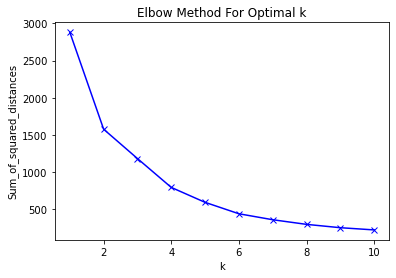

In [74]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [75]:
km = KMeans(n_clusters= 4 ,init='k-means++', max_iter=300 )
km = km.fit(rfm_df_scaled)
km

KMeans(n_clusters=4)

In [77]:
km.labels_

array([2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 3, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2,
       1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1,
       2, 3, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 3,
       2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2])

In [78]:
RFM['Cluster_Id'] = km.labels_
RFM.head()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
0,467361,6,1,472264.0,2
1,468800,48,1,4332453.0,1
2,469481,6,1,1359623.0,2
3,469680,67,1,33015094.0,0
4,470250,92,1,926226.0,1


<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

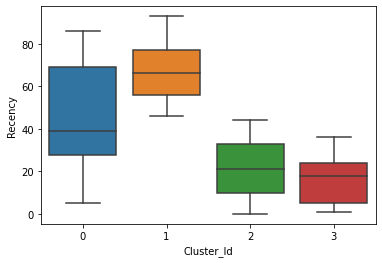

In [79]:
sns.boxplot(x='Cluster_Id', y='Recency', data=RFM)


<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

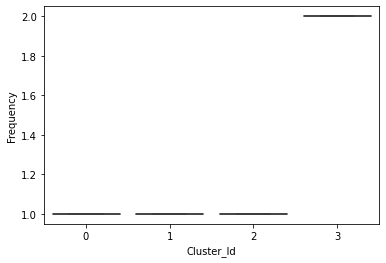

In [80]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=RFM)


<AxesSubplot:xlabel='Cluster_Id', ylabel='Monetary'>

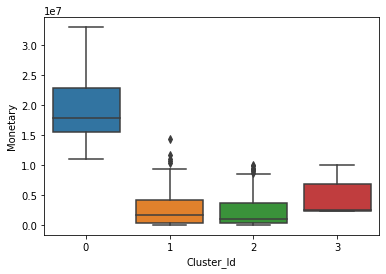

In [81]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=RFM)
